In this assignment we will work with several real psycholinguistics datasets. These datasets are inspired by discussion in this [book](https://osf.io/pnumg/) by McGill Linguistics Professor Morgan Sondregger. 

The first part of the problem set will examine some lexical decision data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The first dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in. 

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). Journal of Experimental Psychology: General, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). Journal of Memory and Language, 53:496– 512, 2006. You can find a copy of this paper.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

This particular file  was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your drive folder from: https://drive.google.com/file/d/19ybVdUWwZh_hSw69DRG7rYJd8o5dKWFK/view?usp=sharing.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english.csv"


Mounted at /content/drive/
'/content/drive/My Drive/english.csv'


Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to read the CSV file into a dataframe and then have a look at the data set.

In [4]:
#Problem 1: Put your answer here
import pandas as pd

english = pd.read_csv('/content/drive/My Drive/english.csv')
english.head()

,RTlexdec,RTnaming,Familiarity,Word,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,InflectionalEntropy,NumberSimplexSynsets,NumberComplexSynsets,LengthInLetters,Ncount,MeanBigramFrequency,FrequencyInitialDiphone,ConspelV,ConspelN,ConphonV,ConphonN,ConfriendsV,ConfriendsN,ConffV,ConffN,ConfbV,ConfbN,NounFrequency,VerbFrequency,CV,Obstruent,Frication,Voice,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
0,6.543754,6.145044,2.37,doe,young,N,3.912023,1.021651,1.386294,0.14144,0.02114,0.693147,0.000000,3,8,7.036333,12.02268,10,3.737670,41,8.837826,8,3.295837,0.693147,2.708050,3.496508,8.833900,49,0,C,obst,burst,voiced,10.129308,10.409763,27
1,6.304942,6.143756,5.60,stress,young,N,6.505784,2.089356,1.609438,0.06197,1.44339,2.484907,1.945910,6,0,9.883931,13.30069,10,6.693324,13,7.040536,10,6.693324,0.000000,0.000000,1.386294,5.817111,565,473,C,obst,frication,voiceless,12.422026,13.127395,30
2,6.424221,6.131878,3.87,pork,young,N,5.017280,-0.526334,1.945910,0.43035,0.00000,1.098612,2.639057,4,8,8.309180,12.07807,5,6.677083,6,3.828641,4,3.526361,0.693147,6.634633,1.098612,2.564949,150,0,C,obst,burst,voiceless,10.048151,11.003649,30
3,6.450597,6.198479,3.93,plug,young,N,4.890349,-1.044545,2.197225,0.35920,1.75393,2.484907,2.484907,4,3,7.943717,11.92678,17,4.762174,17,4.762174,17,4.762174,0.000000,0.000000,0.000000,0.000000,170,120,C,obst,burst,voiceless,11.796336,12.163092,26
4,6.531970,6.167726,3.27,prop,young,N,4.770685,0.924801,1.386294,0.06268,1.74730,1.609438,1.386294,4,9,8.349620,12.19724,19,6.234411,21,6.249975,19,6.234411,0.000000,0.000000,1.098612,2.197225,125,280,C,obst,burst,voiceless,11.991567,12.436772,28


Your first job is to familiarize yourself with the dataset by briefly examining the two papers above. First, read the wikipedia article on lexical decision, and briefly (2-4 sentences) explain the lexical decision experimental task.

**Q1: put your answer here (please keep it brief, 2-4 sentences)**

The lexical decision task is a procedure where candidates are shown either real words or nonsensical words (that still respect language rules), and are asked to indicate the point at which they recognise the word, if they recognise it as a word. The experiment can be structured in many forms to infer psychological features, such as what kind of words can be recognised faster and whether context such as previous words shown can affect recognition time. In cases where candidates have some particular difference in their brain hemispheres, it can be used to determine the differing responsibilities of the hemispheres in word recognition and understanding.

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment. Instead, the goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions. 

***Question 2:*** In these studies and in this dataset various regression models are used to analyze the experimental data. What was measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which columns in the dataset have these values? 

**Q2: put your answer here (please keep it brief, 2-4 sentences)**

**The relevant variables to be predicted are lexical decision times which re in variable RTlexdec and speeded naming times which are in variable RTnaming**

***Question 3:*** In both papers a number of different quantities are used as predictors for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class. Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the first seven features from these papers (`Familiarity` to `FamilySize`).

**Q3: put your answer here (please keep it brief, 1-2 sentences/predictor)**

`Familiarity`: Balota defines familiarity as the subjective frequency norm, based on how frequently a study group says they have encountered a word in their lifetime.

`Word`: The specific word shown to the person in the task, from which other measures are defined.

`AgeSubject`: In Balota, the 'young' age group were recruited from a university undergraduate population with mean age 20.5 years. The 'old' age group were recruited from an 'Ageing and Development Subject Pool' at Washington University, with mean age 73.7 years.

`WordCategory`: Words are split into word categories like Noun and Verb, with N and V representing these two categories respectively.

`WrittenFrequency`: Frequency here is the `log(freq + 1)` of frequencies taken  from a 17.9 million word corpus study produced by the Centre for Lexical Information (CELEX) as used in Baayen 2006, as opposed to frequencies from Zeno, 1995 as used by Balota 2004. The log is used for easier statistical analysis as log word frequencies are approximately normalled distributed.

`WrittenSpokenFrequencyRatio`: Normalized ratio between written frequency of words and spoken frequency of words, to produce a feature of spoken frequency and hence familiarity while reducing a potential colinearity with `WrittenFrequency`. Spoken frequency is taken from the demographic subcorpus of spoken English from the British National Corpus.

`FamilySize`: The log number of complex word types (i.e. derived words and compounds) in which a word occurs as a constituent i.e. embedded in the larger word.


***Question 4:*** For each of these predictors, how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? (Note that there is no right or wrong answer here, so long as you give a justification for your reasoning). Please be brief, no more than 2-4 sentences per predictor.

**Q4: put your answer here (please keep it brief, 1-2 sentences/predictor)**

`Familiarity`: I would expect this predictor to positively correlate with a reduction in lexical decision time and speeded naming time, as an individual having seen and heard a word more times in their life would allow them to more quickly recognise it or say it.

`AgeSubject`: I would expect this predictor to have mixed effects, as older people have seen more words in their lifetime so have a better familiarity with them and hence better ability to recognise and say them, but also potential brain deteoriation in older adults could negate this benefit.

`WordCategory`: I expect verbs to result in a slightly reduced time to recognition and naming, as the use of verbs requires more intimate knowledge of forms and potential manipulation, and thus potentially requires the brain to have a stronger conceptualisation of them.

`WrittenFrequency`: I expect a higher written frequency to result in a lower time to recognition, and potentially a slightly lower time to naming. Reading a word more often should increase ability to recognise it, but unless the person regularly reads out loud, I wouldn't expect ability to name it to be improved dramatically by increased written frequency.

`WrittenSpokenFrequencyRatio`: I expect a high ratio in this predictor to result in a low ratio of decision to naming time, i.e. a faster decision time comparatively to naming time, as reading a word should train recognition more than it trains naming. Conversely, a low ratio here I would expect to result in a faster naming comparatively to decision, as regularly speaking a word would improve ability to voice it out loud.

`FamilySize`: I expect this predictor to reduce both decision time and naming time, as regularly using a word to construct larger words should result in increasing familiarity despite the word being embedded in a larger word. Naming time should decrease because pronounication is often the same for words embedded in larger words.


Let's simplify the dataset a bit, to have fewer columns. 

In [ ]:
# Problem 2: Write some code that drops all of the columns from the 
# English dataset past the 9th column (the last column should be FamilySize)
english = english[['RTlexdec', 'RTnaming', 'Familiarity', 'Word', 'AgeSubject', 'WordCategory', 'WrittenFrequency', 'WrittenSpokenFrequencyRatio', 'FamilySize']]

Now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset.

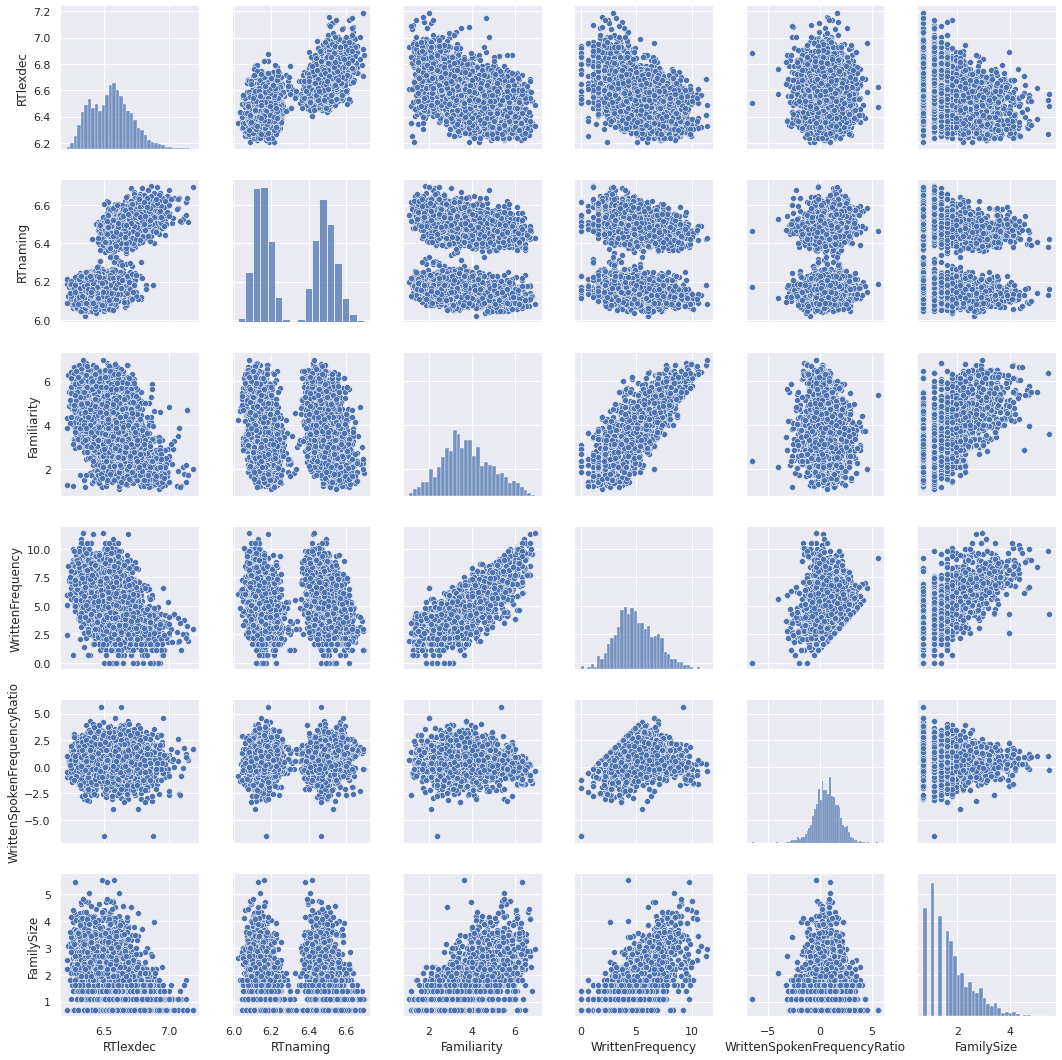

In [ ]:
import seaborn as sns; sns.set()
sns.pairplot(english)

Let's focus on the subset of the data from young participants.

In [8]:
# Problem 3: Write an expression that selects the subset of rows which correspond to the young speakers.
english_young = english.loc[english['AgeSubject'] == 'young']

Let's examine the relationship between the written frequency of a word on it's 
lexical decision time. Use  [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to make a plot with a linear trend line that 
has the fequency on the $x$-axis and lexical decision time on the $y$-axis.

You may also find this page useful in understanding how to use Seaborne to plot regression lines: https://seaborn.pydata.org/tutorial/regression.html


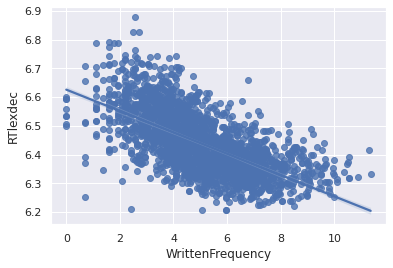

In [ ]:
#Problem 4: use seaborne.regplot to plot the data with a best fit regressions line.
sns.regplot(x="WrittenFrequency", y="RTlexdec", data=english_young)

In order to examine wether or the relationship between two variables is really linear, it is useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression) and is implemented as an option for the line drawn by the `regplot` function. Using this examine whether the relationship between frequency and lexical decision times really looks linear.

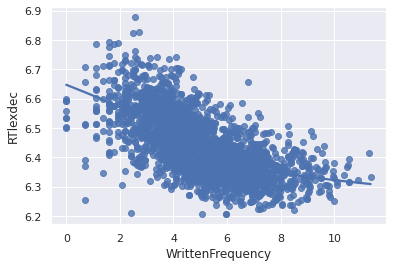

In [ ]:
#Problem 5: use seaborne.regplot to mnake a plot with the best fit LOWESS line.
sns.regplot(x="WrittenFrequency", y="RTlexdec", data=english_young, lowess=True)

***Question 5***: What do you see in this data when you look at the two plots above? Do you think that a linear model represents the relationship between written frequency and reaction times? It may be useful  to turn on an off the plotting of the underlying data points with the `scatter=False` argument to the functions.

**Q5: put your answer here**

Looking at the data, it does seem like there is not necessarily a linear relationship. The LOWESS curve seems to pick up noise for low word frequencies, but the tail off for higher frequencies looks to fit the underlying model when looking at the data and seeing the similar tail off for higher frequencies. 

This could make sense psychologically, in terms of the difference between moderately frequent words that are still required in general situations, versus low frequency words that show up in various specific textbooks but happen incredibly rarely in general situations.

Let's try looking at some more complex models of the relationship between frequency and lexical decision time. Here is some starter code similar to those that we looked at in class for writing a polynomial regression. Complete the code as indicated.


Model class: Linear Regression
	Degree 1
		Train R^2: 0.41157247558347365
		Test R^2: 0.43746907641273797
	Degree 2
		Train R^2: 0.42891003047976767
		Test R^2: 0.4643810296790583
	Degree 3
		Train R^2: 0.4473757516560852
		Test R^2: 0.4668148716339
	Degree 4
		Train R^2: 0.45722259263164333
		Test R^2: 0.46426151091295864
	Degree 5
		Train R^2: 0.45722544146941824
		Test R^2: 0.46413720991199564
	Degree 6
		Train R^2: 0.45941145461144794
		Test R^2: 0.45412117096667615
	Degree 7
		Train R^2: 0.4596218312862536
		Test R^2: 0.45343285707015785
	Degree 20
		Train R^2: 0.45456081894867906
		Test R^2: 0.4252971390414546
	Degree 25
		Train R^2: 0.33024956868887034
		Test R^2: 0.3464062527134031


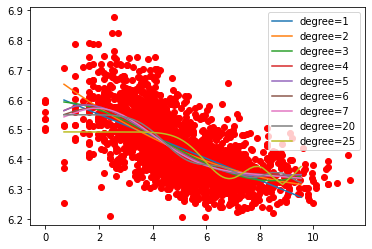

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Problem 6: Set up variable X (For features) and y from the input data.
X = english_young["WrittenFrequency"].to_numpy()
y = english_young["RTlexdec"].to_numpy()
# Problem 7: split this into test and train subsets, with 10% of the data in test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')
plt.ylim((6.18, 6.91))

print("Model class: " + "Linear Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  # Problem 8: fit a polynomial regression model of each degree above
  r = LinearRegression()
  model = make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train.reshape(-1, 1), y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train.reshape(-1, 1),y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test.reshape(-1, 1),y_test)))  

  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.
  plt.plot(np.sort(X_test), model.predict(np.sort(X_test).reshape(-1, 1)), label=f"degree={degree}")

plt.legend()

***Question 6:*** Which degree polynomial provided the best fit to this dataset? What does this say about the relationship between frequency and lexical decision times?

**Q6: put your answer here (please keep it brief, 2-4 sentences)**
The polynomial with degree 3 fit the data the best going purely off R^2 scores on the test set. This implies the relationship between log word frequency and lexical decision time is more complex than a simple degree 1 linear model, as the degree 1 model fit the data much worse than the polynomial with degree 3. This implies that there is a disproportional increase of lexical decision time with decreasing word frequency.

Model class: Lasso Regression
	Degree 1
		Train R^2: 0.0
		Test R^2: -0.01611375901648393
	Degree 2
		Train R^2: 0.13335667020297726
		Test R^2: 0.1086423863725755
	Degree 3
		Train R^2: 0.27634224524192097
		Test R^2: 0.24403961763522497
	Degree 4
		Train R^2: 0.3144773521746099
		Test R^2: 0.28205170123100076
	Degree 5
		Train R^2: 0.3784108880288351
		Test R^2: 0.3540235425392051
	Degree 6
		Train R^2: 0.3752074735581493
		Test R^2: 0.3504515034940312
	Degree 7
		Train R^2: 0.41260014869189376
		Test R^2: 0.38291839970370944
	Degree 20
		Train R^2: 0.43234763206188725
		Test R^2: 0.4004618039836501


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.915125352937583, tolerance: 0.00229200883855581
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.819953310671432, tolerance: 0.00229200883855581
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.034287807482397, tolerance: 0.00229200883855581
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0325

	Degree 25
		Train R^2: 0.43047063608841296
		Test R^2: 0.39838626370166


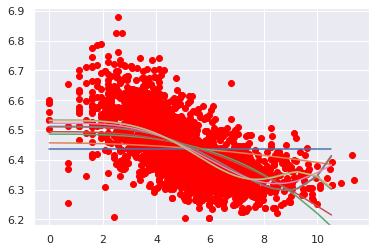

In [ ]:
# Problem 10: Repeat the above analyses using Lasso and Ridge regression.
from sklearn.linear_model import Lasso, Ridge

X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')

print("Model class: " + "Lasso Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  # lasso regression
  r = Lasso()
  model = make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train.reshape(-1, 1), y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train.reshape(-1, 1),y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test.reshape(-1, 1),y_test)))  

  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.
  plt.plot(np.sort(X_test), model.predict(np.sort(X_test).reshape(-1, 1)), label=f"degree={degree}")
  plt.ylim((6.18, 6.91))

Model class: Ridge Regression
	Degree 1
		Train R^2: 0.414351192527715
		Test R^2: 0.4032147323033072
	Degree 2
		Train R^2: 0.43245344493054827
		Test R^2: 0.42330684159565524
	Degree 3
		Train R^2: 0.449724760093086
		Test R^2: 0.4376497131405571
	Degree 4
		Train R^2: 0.45844567155696064
		Test R^2: 0.4454377108925656
	Degree 5
		Train R^2: 0.45840372429091997
		Test R^2: 0.44452134071879806
	Degree 6
		Train R^2: 0.4600671922684148
		Test R^2: 0.4427692819728055
	Degree 7
		Train R^2: 0.4602705635024058
		Test R^2: 0.4424651525044996
	Degree 20
		Train R^2: -11.072811508909753
		Test R^2: -1.7455614510405038
	Degree 25
		Train R^2: 0.3880469390114799
		Test R^2: 0.3658522898834561


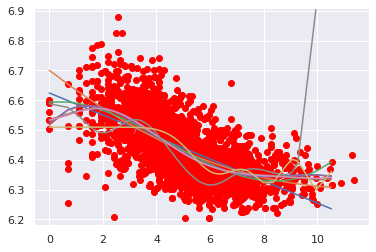

In [ ]:
X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='red')

print("Model class: " + "Ridge Regression")
for degree in [1,2,3,4,5,6,7,20,25]:
  # ridge regression
  r = Ridge()
  model = make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train.reshape(-1, 1), y_train)
  
  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train.reshape(-1, 1),y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test.reshape(-1, 1),y_test)))  

  # Problem 9: use plt.plot to add a line to the plot for this model using the X_plot points.
  plt.plot(np.sort(X_test), model.predict(np.sort(X_test).reshape(-1, 1)), label=f"degree={degree}")
  plt.ylim((6.18, 6.91))

***Question 7:*** What did you find using these regularization techniques? How were they similar or different to eachother and the results above? Why?

**Q7: put your answer here (please keep it brief, 4-6 sentences)**
Ridge regression performs better on train and test sets on average then Lasso, but has one result that does not converge at all with a high order polynomial than deviates massively from the data. Lasso may be better at not producing bad models due to higher order terms tending to be the terms that lead models to extremely poor fits, and the ability of Lasso regression to quickly turn off high order polynomial terms in models during training via its prior pushing values towards zero. This effect is also why the Lasso model performs on average worse than Ridge regression, as seem in the most obvious example of the order 1 polynomial for Lasso regression having a slope of zero, and fitting the data extremely poorly. 

Ridge regression's disproportionate punishment of large coefficient values for models seems to produce gentler curves that fit the data well, with all polynomial models from degree 4 to degree 7 producing similar accuracies and having similar curves. In general both Lasso and Ridge models exhibit less extreme overfitting than a simple linear regression, showcasing the general ability of regularisation producing models that overfit less and generalize better.

Now we will look at aniother dataset available [here](https://drive.google.com/file/d/1eaQSqiJFyrsDprmsKzZ0ysxBUmyBzVGX/view?usp=sharing).

This dataset is about morphological *regularity*&mdash;the property of whether words marke certain information like tense using regular endings (e.g., *walk*/*walked*) or irregular processes (e.g., *sing*/*sang*). The dataset consists of a Dutch verbs and is described in the following paper.


Tabak, W. M., Schreuder, R., and Baayen, R. H. (2005). [Lexical statistics and lexical processing: Semantic density, information complexity, sex, and irregularity in Dutch.](https://drive.google.com/file/d/1WRqjc7MwbCiSgOXESszBfxclnxQgAhu5/view?usp=sharing) In Kesper, S. and Reis, M., editors, Linguistic Evidence — Empirical, Theoretical, and Computational Perspectives, pages 529–555. Mouton de Gruyter, Berlin, Germany.



In [5]:
#Problemm 11: Read in the regularity dataset and familiarize yourself with it.
df = pd.read_csv('/content/drive/My Drive/regularity.csv')
df.head()

,Unnamed: 0,Verb,WrittenFrequency,FamilySize,LengthInLetters,VerbalSynsets,MeanBigramFrequency,NcountStem,Regularity,InflectionalEntropy,Auxiliary,Valency,NVratio,WrittenSpokenRatio
0,1,stelen,1.609438,2.564949,5,1,14.47,9,regular,1.00000,hebben,3,4.366913,-2.302585
1,2,tollen,5.411646,2.397895,3,1,13.61,26,regular,2.48640,zijnheb,3,-0.078927,-2.351375
2,3,blijken,9.883183,1.791759,5,1,13.84,6,irregular,2.00458,zijn,4,-3.192341,-1.526056
3,4,gloeien,6.908755,2.079442,5,3,12.95,4,regular,2.56009,hebben,5,-6.908755,1.791759
4,5,kakken,3.784190,2.079442,3,1,13.48,24,regular,1.99257,hebben,2,-0.526093,-1.386294


Figure 1 in the paper displays the correlations between various factors (features) and predictability. 

***Question 8***: Briefly describe what each of the 5 factors  excluding  inflectional entropy, log argument structures, and log N-count means and what relationship it shows to regularity.

**Q8: put your answer here. no more than 1-2 sentences per factors.**

`log Lemma Frequency`: The summed frequency of all inflectional variations of a verb taken from the CELEX dataset, or in other words, the summed frequency of all words whose lemma is the base verb of interest. The feature shows an negative correlation with regularity, and specifically a roughly quadratic reduction in regularity with increased frequency.

`log Family Size`: The number of complex words in which the word stem appears as a consituent (i.e. embedded in the complex word). This feature shows little to no correlation with regularity, with maybe a slight decrease in regularity for a medium family size.

`Auxiliary`: The auxiliary selected by the verb for the present perfect tense, in this paper specified in Dutch, where 'hebben' is 'have', 'zijn' is 'be', and 'zjinheb' presumably means both can be used (this is unspecified in the paper). 'hebben' and 'zjinheb' tend to result in high regularity, and 'zijn' results in low regularity.

`Noun-Verb Frequency Ratio`: The ratio of nominal to verbal frequencies, i.e. the ratio of the frequency at which the word appears as a noun to the frequency with which it appears as a verb. This feature has a positive correlation with regularity, with a gentle gradient.

`Spoken-Written Frequency Ratio`: The ratio of the verb's frequency in spoken and written Dutch. This feature has a positive correlation with regularity, with a gentle gradient.


In this section, we will focus on the relationship between `FamilySize` and `Regularity`. Unlike in the last dataset, regularity is not a continuous value, but rather a binary variable. Thus we will need to use a classification model to examine it.

For this pupose, we will use logistic regression.

[0.765079365079365, 0.7285714285714285]

['regular']
[[0.37893672 0.62106328]]


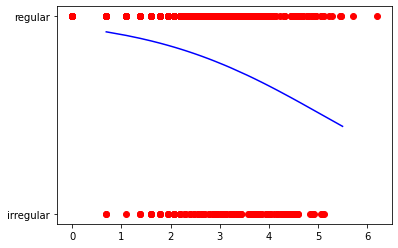

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Problem 12: set up X as FamilySize, y as Regularity in 
#preparation to use them to fit a logistic regression model.
X = df["FamilySize"].to_numpy()
y = df["Regularity"].to_numpy()

#Problem 13: split X, and y into train and test with 10% test split. And also create
# and X_plot variable for plotting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_plot = np.linspace(0, 10,5000).reshape(-1, 1)

#Problem 14: fit a logistic regression model on this data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train.reshape(-1, 1), y=y_train)

display([accuracy_score(y_train, lr_model.predict(X_train.reshape(-1, 1))),accuracy_score(y_test, lr_model.predict(X_test.reshape(-1, 1)))])

#Problem 15: using plt.plot make a scatter plot of the data along with the predicted 
# probability of regularity as a function of family size. you will find the "predict_proba" function helpful.
plt.scatter(X_train, y_train, color='red')
print(lr_model.predict(X_test[0].reshape(1, 1)))
# produces ['regular']
print(lr_model.predict_proba(X_test[0].reshape(1, 1)))
# produces [[0.37893672 0.62106328]]
# So the second row is the probability of the sample being 'regular', and 'regular' is at the top of our scatter so that's the probability we want to plot
plt.plot(np.sort(X_test), lr_model.predict_proba(np.sort(X_test).reshape(-1, 1))[:, 1], color='blue')

***Question 9***: What do you see in the fit to the logistic regression? How does the probability of being regular vary with morphological family size?

**Q9: put your answer here. no more than 2-4 sentences.**
The fitted logistic regression model predicts a smaller morphological family will result in a high probability of a regular verb, and a larger morphological family to result in a high probability of an irregular verb. In other words, morphological family size results in a negative correlation with probability of regularity.

***Question 10***: What does the relationship on Figure 1 of the paper look like? Does this match your analysis above?

**Q10: put your answer here. no more than 2-4 sentences.**

This analysis does not fit with the finding from the paper. Logistic regression produced a model that resulted in a much stronger negative correlation than the paper, which showed only a slight correlation of lower probability of regularity for medium sized families.

In class, we saw an example of a regression problem in which the curve was best fit by a polynomial. We can, of course, use polynomial relationships in a classification model as well. Let's take a similar approach to the analysis that we just did, except first transforming our input features polynomially.

Model class: Logistic Regression
	Degree 1
		Train R^2: 0.765079365079365
		Test R^2: 0.7285714285714285
	Degree 2
		Train R^2: 0.765079365079365
		Test R^2: 0.7285714285714285
	Degree 3
		Train R^2: 0.765079365079365
		Test R^2: 0.7285714285714285
	Degree 4
		Train R^2: 0.765079365079365
		Test R^2: 0.7285714285714285
	Degree 5
		Train R^2: 0.765079365079365
		Test R^2: 0.7285714285714285


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


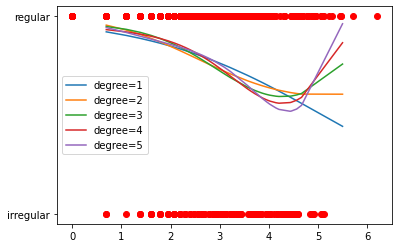

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import  scipy

#Problem 16: Set up X, y, test and train as above.
X = df["FamilySize"].to_numpy()
y = df["Regularity"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_plot = np.linspace(0, 6,5000).reshape(-1, 1)

#Problem 17: Plot the data points using plt.scatter.
plt.scatter(X_train, y_train, color='red')

print("Model class: " + "Logistic Regression")
for degree in [1,2,3,4,5]:

  #Problem 18: set up a logistic regression model with polynomial features of degree and train it.
  r = LogisticRegression(random_state=42)
  model = make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train.reshape(-1, 1), y_train)

  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(accuracy_score(y_train, lr_model.predict(X_train.reshape(-1, 1)))))
  print("\t\tTest R^2: "+ str(accuracy_score(y_test, lr_model.predict(X_test.reshape(-1, 1)))))

  #Problem 19: Plot the resulting predicted probability line on the plot.
  plt.plot(np.sort(X_test), model.predict_proba(np.sort(X_test).reshape(-1, 1))[:, 1], label=f"degree={degree}")
plt.legend()

***Question 11***: What do you see in the fit of these polynomial features? What is the relationship in plain English between the family size variable and the probability of being regular?

**Q11: put your answer here. no more than 2-4 sentences.**

These polynomial models produce predictions that match the correlation produced in the paper much better, showing the dip in regularity probability for medium sized morphological families. As the polynomial degree increases, the models predictions converge to a relationship that shows a decreasing probability of verb regularity for as morphological family size increases, until a log family size of roughly 4.5 when any increase in family size results in a quickly increasing probability of verb regularity.

***Question 12***: Speculate as to why this relationship might hold theoretically?

**Q12: put your answer here. no more than 2-4 sentences.**

Verbs that have medium sized morphological family sizes may be more likely to be irregular because they have a large enough number of complex words that they appear in that they need to be manipulated in a number of different irregular ways to fit language rules, but not so many different words that people can't remember the different forms. At a certain point of family size, people can't remember the different irregular forms so a set regular form is fallen back on.